In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prediction(X: np.array, theta: np.array) -> np.array:
    """Return pred of multiple linear regression
    (result of hypothesis function)    
    
    Number of explanatory variable : n
    Number of data : m
    
    X     : m * n matrix
    theta : vector with n elements (~= n * 1 matrix)
    """
    
    return X @ theta

In [3]:
def gradient_descent(
    X : np.array,
    theta : np.array,
    y : np.array,
    iterations : int,
    alpha : float
    ) -> np.array:
    
    """Return updated theta with gradient descent"""
    
    costs = []
    m = len(X)
    for _ in range(iterations):
        error = prediction(X, theta) - y
        costs.append((error @ error) / (2 * m))
        theta -= (alpha / m) * (X.T @ error)            
    
    return theta, costs
    

[22.  21.8 21.2 26.7 24.7 24.8 25.5 26.2 29.7 31.4 33.1 33.9 39.  39.4
 39.5 40. ]
[ 0.18411079  0.45863266 -0.06568251  2.05404881]


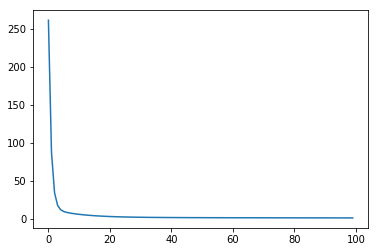

In [4]:
if __name__ == '__main__':
    
    ## input variables
    house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
    distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
    number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수
    
    ## design matrix : X
    X = np.array([
        np.ones(house_size.shape[0]),
        house_size,
        distance_from_station,
        number_of_rooms
    ]).T
    
    ## parameter theta
    theta = np.array([1, 2, 3, 4], dtype='float64')
    
    print(prediction(X, theta))

    ## target variable
    house_price = np.array([3, 3.2, 3.6 , 8, 3.4, 4.5, 5, 5.8, 6, 6.5, 9, 9, 10, 12, 13, 15])  # 집 가격

    ## gradient descent with alpha 0.01 and 100 iterations
    y = house_price
    theta, costs = gradient_descent(X, theta, y, 100, 0.01)
    print(theta)
    
    ## visualing loss function
    plt.plot(costs)